In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae#
import warnings
from copy import deepcopy
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("cubehelix", 8)#"deep")
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from problem_creator import gen_regression_symbolic, gen_classification_symbolic
from scipy.stats import weightedtau
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.evaluate import feature_importance_permutation

In [2]:
X = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(2)
poly.fit_transform(X)
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [3]:
def test_data(datapoints=1000, grad=4):
    #x1 = np.random.normal(0,1,datapoints)
    #x2 = np.random.normal(0,1,datapoints)
    x1 = np.random.uniform(-1,1,datapoints)
    x2 = np.random.uniform(-1,1,datapoints)
    X = np.array([x1,x2]).T
    poly = PolynomialFeatures(grad,include_bias=False, interaction_only=True)
    X_y = poly.fit_transform(X)
    print(poly.get_feature_names())
    y = np.sum(X_y,axis=1)
    return X,y, X_y

['x0', 'x1', 'x0 x1']


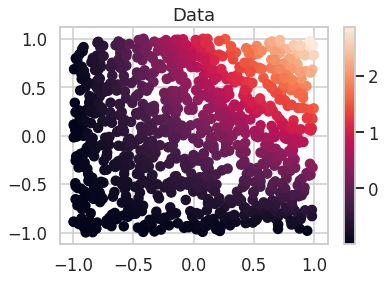

[15:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [7]:
X, y, X_y = test_data(grad =2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
plt.title('Data')
plt.show()
model = xgb.XGBRegressor(gbtree='gbtree').fit(X,y)

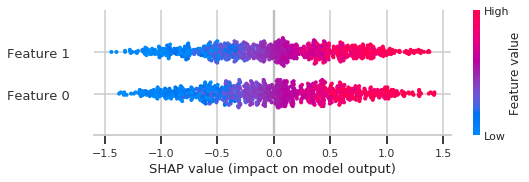

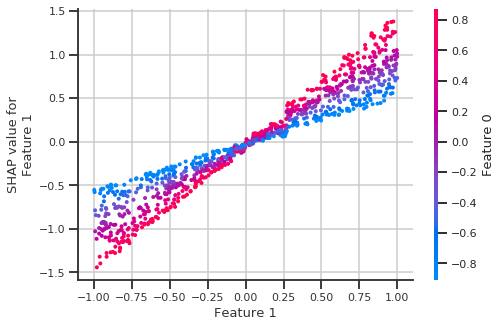

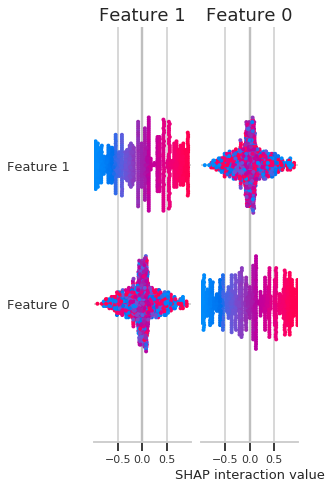

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_coeffs = np.absolute(shap_values).mean(axis=0)
shap.summary_plot(shap_values, X)
shap.dependence_plot('Feature 1',shap_values,X)
# shap.dependence_plot('Feature 0',shap_values,X)
# shap.dependence_plot('Temperature',shap_values,X)
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X, plot_type='dot')

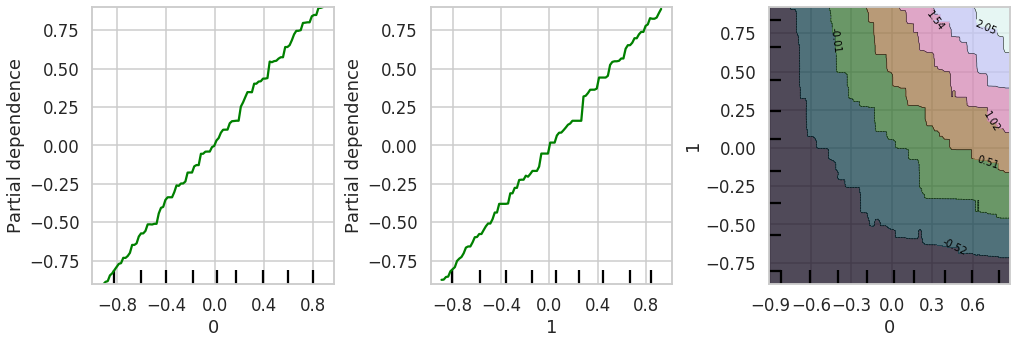

In [9]:
features = [0, 1,(0, 1)]
fig = plt.figure(figsize=(15,7))
plot_partial_dependence(model, X, features,fig=fig, contour_kw= {'cmap':'cubehelix'}) 
plt.show()

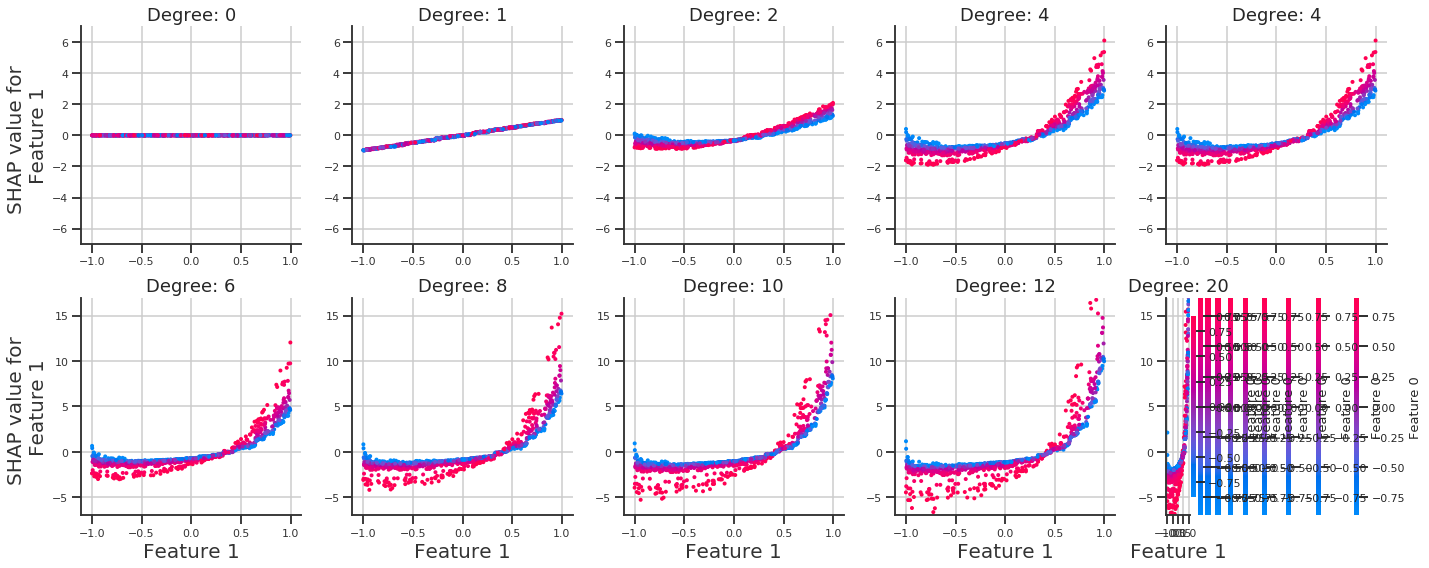

In [10]:
#x1 = np.random.normal(0,1,datapoints)
#x2 = np.random.normal(0,1,datapoints)
datapoints=1000
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
x3 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
fig, ax = plt.subplots(2,5,figsize=(20,8),sharex=True)
for i,g in enumerate([0,1,2,4,4,6,8,10,12,20]):
    poly = PolynomialFeatures(g, include_bias=True, interaction_only=False)
    X_y = poly.fit_transform(X)
    y = np.sum(X_y,axis=1)
    model = xgb.XGBRegressor(gbtree='gbtree',objective='reg:squarederror').fit(X,y)
    preds = model.predict(X)
    score = mae(preds, y)
#     print('Model MAE:', round(score,3))
#     print('Feature: ',poly.get_feature_names())
#     print('Number of Features: ',poly.n_output_features_)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap_coeffs = np.absolute(shap_values).mean(axis=0)
    shap_interaction_values = explainer.shap_interaction_values(X)
    #fig, ax = plt.subplots(4,2figsize=(7,5))
    if i <5:
        j=0
        ax[j,i%5].set_ylim(-7,7)
    else:
        j=1
    
        ax[j,i%5].set_ylim(-7,17)
    ax[j,i%5].set_title('Degree: {}'.format(g))
    shap.dependence_plot('Feature 1',shap_values,X,interaction_index='Feature 0',ax=ax[j,i%5], show=False)
    ax[j,i%5].set_ylabel('SHAP value for \nFeature 1',fontsize=20)
    ax[j,i%5].set_xlabel('Feature 1',fontsize=20)
    if (i%5 != 0):
        ax[j,i%5].set_ylabel('')
    if j == 0:
        ax[j,i%5].set_xlabel('')
    #if (i%5 != 4):
        #fig.colorbar()
    #shap.summary_plot(shap_values, X)
   # shap.summary_plot(shap_interaction_values, X, plot_type='dot')
plt.tight_layout()
#plt.colorbar()
plt.show()

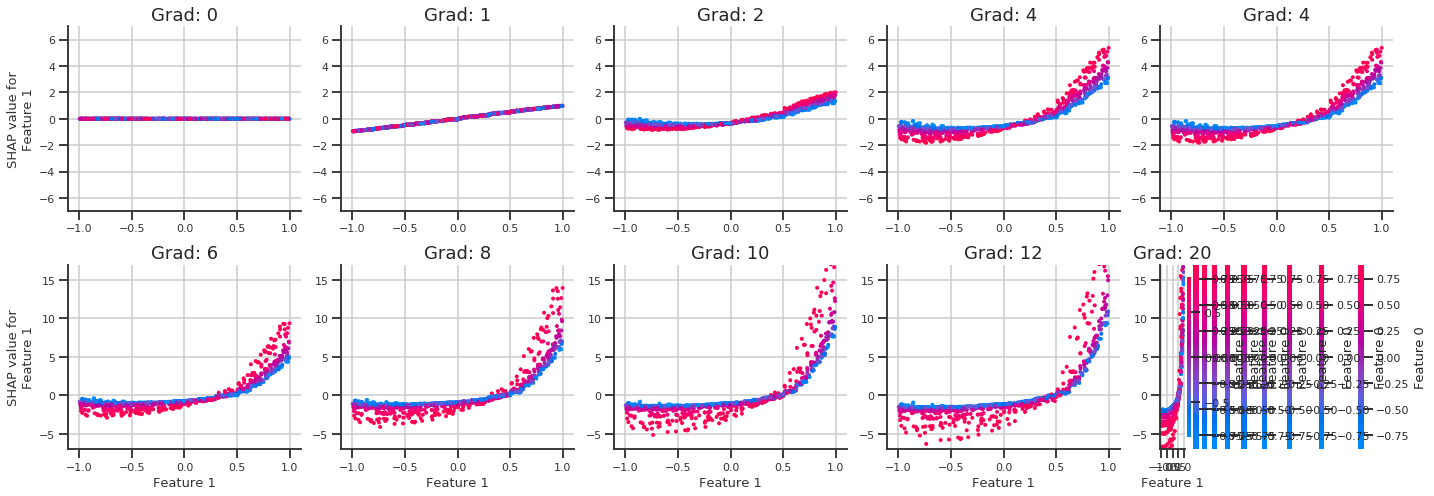

In [11]:
datapoints=1000
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
fig, ax = plt.subplots(2,5,figsize=(20,7),sharex=True)
for i,g in enumerate([0,1,2,4,4,6,8,10,12,20]):
    poly = PolynomialFeatures(g, include_bias=True, interaction_only=False)
    X_y = poly.fit_transform(X)
    y = np.sum(X_y,axis=1)
    model = xgb.XGBRegressor(gbtree='gbtree',objective='reg:squarederror').fit(X,y)
    preds = model.predict(X)
    score = mae(preds, y)
#     print('Model MAE:', round(score,3))
#     print('Feature: ',poly.get_feature_names())
#     print('Number of Features: ',poly.n_output_features_)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap_coeffs = np.absolute(shap_values).mean(axis=0)
    shap_interaction_values = explainer.shap_interaction_values(X)
    #fig, ax = plt.subplots(4,2figsize=(7,5))
    if i <5:
        j=0
        ax[j,i%5].set_ylim(-7,7)
    else:
        j=1
    
        ax[j,i%5].set_ylim(-7,17)
    ax[j,i%5].set_title('Grad: {}'.format(g))
    shap.dependence_plot('Feature 1',shap_values,X,interaction_index='Feature 0',ax=ax[j,i%5], show=False)
    if (i%5 != 0):
        ax[j,i%5].set_ylabel('')
    if j == 0:
        ax[j,i%5].set_xlabel('')
    #if (i%5 != 4):
        #fig.colorbar()
    #shap.summary_plot(shap_values, X)
   # shap.summary_plot(shap_interaction_values, X, plot_type='dot')
plt.tight_layout()
#plt.colorbar()
plt.show()

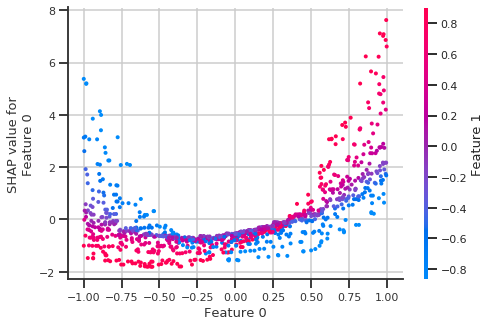

In [2]:
datapoints=1000
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
#y = (x1+x2)**2 * (x1-x2)**2 
y = x1 + x2 + (x1+x2)**4
#y = (x1+x2)**2
model = xgb.XGBRegressor(gbtree='gbtree',objective='reg:squarederror').fit(X,y)
preds = model.predict(X)
score = mae(preds, y)
#     print('Model MAE:', round(score,3))
#     print('Feature: ',poly.get_feature_names())
#     print('Number of Features: ',poly.n_output_features_)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_coeffs = np.absolute(shap_values).mean(axis=0)
shap_interaction_values = explainer.shap_interaction_values(X)
shap.dependence_plot('Feature 0',shap_values,X,interaction_index='Feature 1')

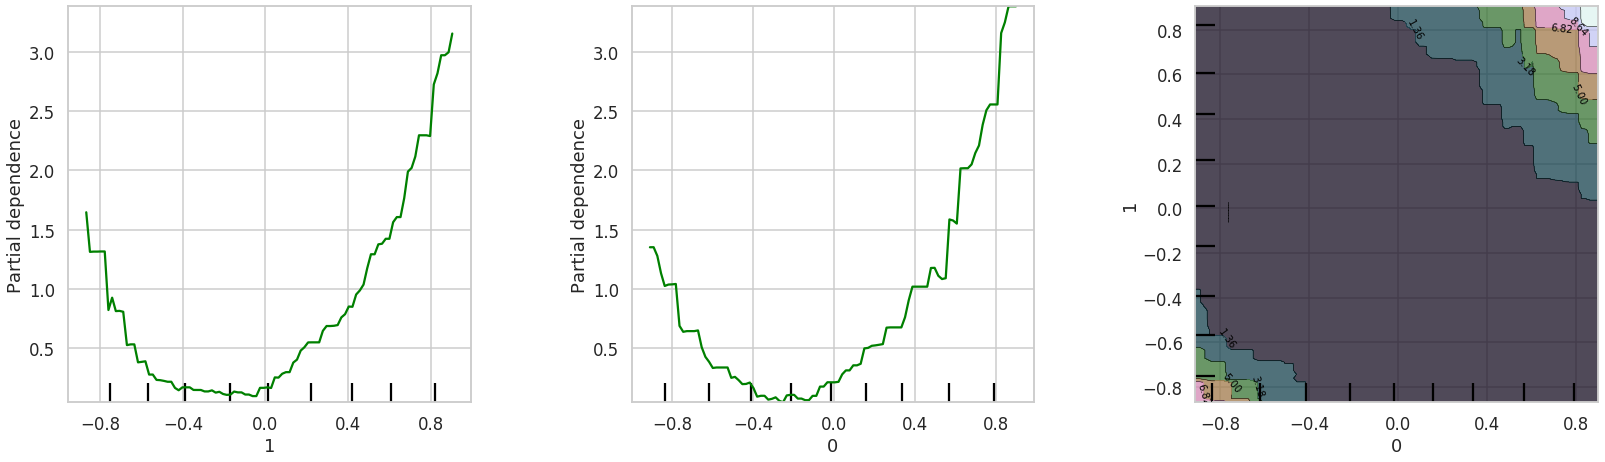

In [3]:
features = [1, 0,(0, 1)]
fig = plt.figure(figsize=(25,10))
plot_partial_dependence(model, X, features,fig=fig, contour_kw= {'cmap':'cubehelix'}) 
plt.show()

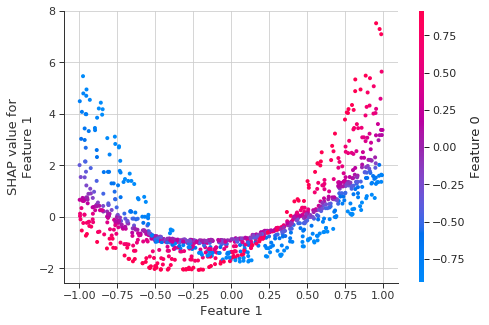

In [11]:
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
y = x1 + x2 + x1**2 + x2**2 +(x1+x2)**2 * (x1+x2)**2 
model = xgb.XGBRegressor(gbtree='gbtree',objective='reg:squarederror').fit(X,y)
preds = model.predict(X)
score = mae(preds, y)
#     print('Model MAE:', round(score,3))
#     print('Feature: ',poly.get_feature_names())
#     print('Number of Features: ',poly.n_output_features_)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_coeffs = np.absolute(shap_values).mean(axis=0)
shap_interaction_values = explainer.shap_interaction_values(X)
shap.dependence_plot('Feature 1',shap_values,X,interaction_index='Feature 0')

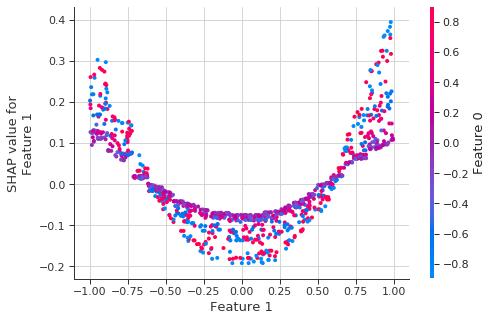

In [5]:
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
y = x1**2 * x2**2 
model = xgb.XGBRegressor(gbtree='gbtree',objective='reg:squarederror').fit(X,y)
preds = model.predict(X)
score = mae(preds, y)
#     print('Model MAE:', round(score,3))
#     print('Feature: ',poly.get_feature_names())
#     print('Number of Features: ',poly.n_output_features_)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_coeffs = np.absolute(shap_values).mean(axis=0)
shap_interaction_values = explainer.shap_interaction_values(X)
shap.dependence_plot('Feature 1',shap_values,X,interaction_index='Feature 0')

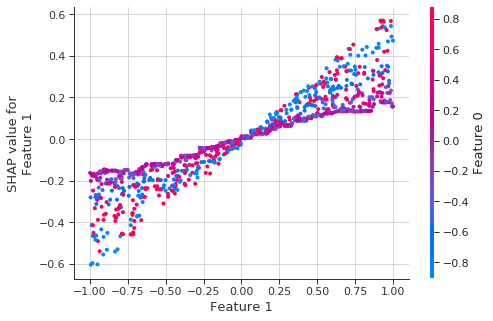

In [9]:
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
y = x1**2 * x2
model = xgb.XGBRegressor(gbtree='gbtree',objective='reg:squarederror').fit(X,y)
preds = model.predict(X)
score = mae(preds, y)
#     print('Model MAE:', round(score,3))
#     print('Feature: ',poly.get_feature_names())
#     print('Number of Features: ',poly.n_output_features_)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_coeffs = np.absolute(shap_values).mean(axis=0)
shap_interaction_values = explainer.shap_interaction_values(X)
shap.dependence_plot('Feature 1',shap_values,X,interaction_index='Feature 0')

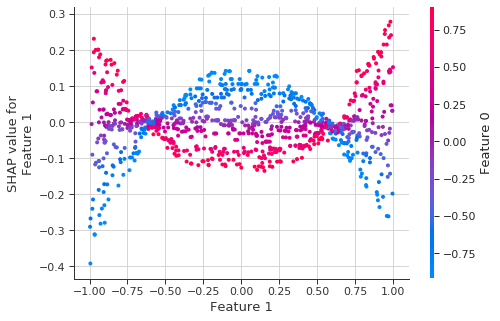

In [6]:
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
y = x1 * x2**2 
model = xgb.XGBRegressor(gbtree='gbtree',objective='reg:squarederror').fit(X,y)
preds = model.predict(X)
score = mae(preds, y)
#     print('Model MAE:', round(score,3))
#     print('Feature: ',poly.get_feature_names())
#     print('Number of Features: ',poly.n_output_features_)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_coeffs = np.absolute(shap_values).mean(axis=0)
shap_interaction_values = explainer.shap_interaction_values(X)
shap.dependence_plot('Feature 1',shap_values,X,interaction_index='Feature 0')

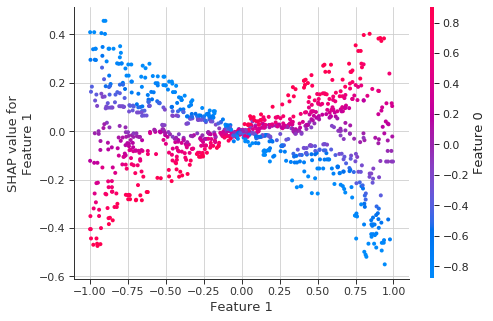

In [7]:
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
y = x1 * x2
model = xgb.XGBRegressor(gbtree='gbtree',objective='reg:squarederror').fit(X,y)
preds = model.predict(X)
score = mae(preds, y)
#     print('Model MAE:', round(score,3))
#     print('Feature: ',poly.get_feature_names())
#     print('Number of Features: ',poly.n_output_features_)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_coeffs = np.absolute(shap_values).mean(axis=0)
shap_interaction_values = explainer.shap_interaction_values(X)
shap.dependence_plot('Feature 1',shap_values,X,interaction_index='Feature 0')

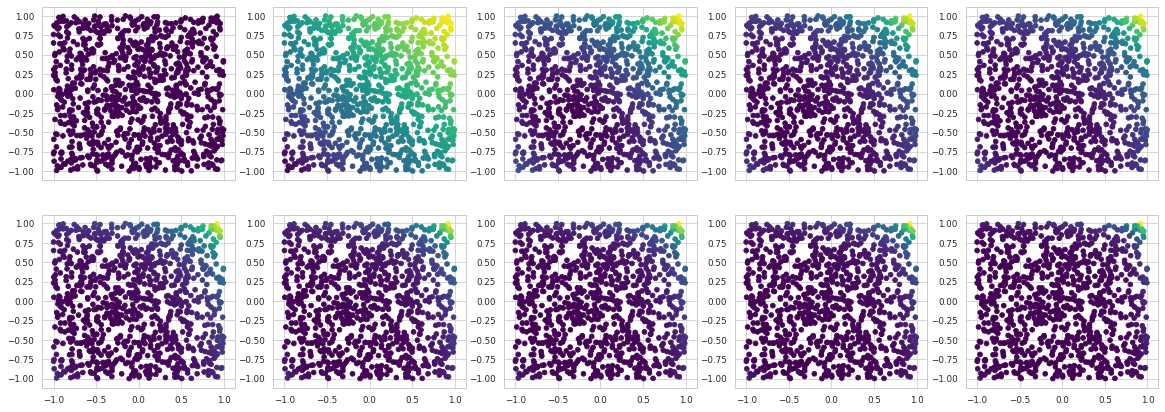

In [320]:
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
X = np.array([x1,x2]).T
fig, ax = plt.subplots(2,5,figsize=(20,7),sharex=True)
for i,g in enumerate([0,1,2,4,4,6,8,10,12,20]):
    poly = PolynomialFeatures(g, include_bias=True, interaction_only=False)
    X_y = poly.fit_transform(X)
    y = np.sum(X_y,axis=1)
    if i <5:
        j=0
    else:
        j=1
    ax[j,i%5].scatter(x1,x2,c=y, cmap='viridis')